In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# convert to numpy array
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

# get 1000 rows and transpose so each column is an example
data_dev = data[0:1000].T
y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
# get training data and transpose, X and y
data_train = data[1000:m].T
y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [28]:
# single column shape
X_train[:, 0].shape

(784,)

#### Neural network part

In [94]:
# initialize parameters
def init_params():
    # weights and biases of 1st layer, random
    # shape of 10(digits), 784(pixels per img)
    w1 = np.random.rand(10, 784) - 0.5
    # shape of 10(digits), 1 column
    b1 = np.random.rand(10,1) -0.5
    # weight and biases for 2nd layer
    w2 = np.random.rand(10,10)-0.5
    b2 = np.random.rand(10,1)-0.5
    return w1, b1, w2, b2

# rectified linear activation function
def relu(z):
    '''
    the relu function is 0 for x<=0, and x for x>0
    '''
    return np.maximum(z,0) # element-vise max

# softmax activation function
def softmax(z):
    '''
    formula is e^zi / Sum(e^zi) foreach i in range 10
    '''
    return np.exp(z) / sum(np.exp(z))
# forward pass/propagation
def forward_pass(w1,b1,w2,b2,X):
    '''
    forward pass of the input through the network
    multiplying by weights, adding biases
    and activating with the functions
    '''
    z1 = w1.dot(X) + b1 # output of 1st layer z1
    a1 = relu(z1) # activation function on z1
    z2 = w2.dot(a1) + b2 # output of 2nd layer z2
    a2 = softmax(z2) # activation function on z2, softmax for output vector between 0 and 1
    return z1,a1,z2,a2
    
# one hot encode the classes 
def one_hot(y):
    # matrix of zeros in the given size
    one_hot_y = np.zeros((y.size, y.max()+1))
    # set the corresponding class to 1
    one_hot_y[np.arange(y.size), y] = 1
    # transpose for consistency
    one_hot_y = one_hot_y.T
    return one_hot_y

# relu derivative, for backprop
def deri_relu(z):
    # derivate of the simple relu is 0 for x<0
    # and 1 for x>=0
    return z>0

def back_prop(z1,a1,z2,a2,w1,w2,X,y):
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deri_relu(z1)
    dw1 = 1 / m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2, alpha):
    w1 = w1 - alpha*dw1
    b1 = b1 - alpha*db1
    w2 = w2 - alpha*dw2
    b2 = b2 - alpha*db2
    return w1,b1,w2,b2

def get_predictions(a2):
    return np.argmax(a2,0)
def get_accuracy(predictions, y):
    print(predictions,y)
    return np.sum(predictions == y)/y.size

def gradient_descent(X,y,iterations,alpha):
    w1,b1,w2,b2 = init_params()
    for i in range (iterations):
        z1,a1,z2,a2 = forward_pass(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2 = back_prop(z1,a1,z2,a2,w1,w2,X,y)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i % 50 == 0:
            print('Iteration:', i)
            print('Accuracy:', get_accuracy(get_predictions(a2),y))
    return w1,b1,w2,b2

In [96]:
w1,b1,w2,b2 = gradient_descent(X_train, y_train, 1000, 0.1)

Iteration: 0
[8 6 1 ... 0 6 0] [7 4 4 ... 7 3 4]
Accuracy: 0.09634146341463415
Iteration: 50
[7 6 6 ... 1 3 9] [7 4 4 ... 7 3 4]
Accuracy: 0.5705853658536585
Iteration: 100
[7 6 4 ... 1 3 9] [7 4 4 ... 7 3 4]
Accuracy: 0.6876341463414634
Iteration: 150
[7 6 4 ... 1 3 9] [7 4 4 ... 7 3 4]
Accuracy: 0.7475609756097561
Iteration: 200
[7 6 4 ... 1 3 9] [7 4 4 ... 7 3 4]
Accuracy: 0.7826585365853659
Iteration: 250
[7 6 4 ... 1 3 9] [7 4 4 ... 7 3 4]
Accuracy: 0.8061707317073171
Iteration: 300
[7 6 4 ... 1 3 9] [7 4 4 ... 7 3 4]
Accuracy: 0.8218048780487804
Iteration: 350
[7 6 4 ... 1 3 9] [7 4 4 ... 7 3 4]
Accuracy: 0.8335121951219512
Iteration: 400
[7 1 4 ... 1 3 9] [7 4 4 ... 7 3 4]
Accuracy: 0.8426829268292683
Iteration: 450
[7 1 4 ... 1 3 9] [7 4 4 ... 7 3 4]
Accuracy: 0.849390243902439
Iteration: 500
[7 1 4 ... 1 3 4] [7 4 4 ... 7 3 4]
Accuracy: 0.855390243902439
Iteration: 550
[7 1 4 ... 1 3 4] [7 4 4 ... 7 3 4]
Accuracy: 0.8597560975609756
Iteration: 600
[7 1 4 ... 1 3 4] [7 4 4 ... 

In [97]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


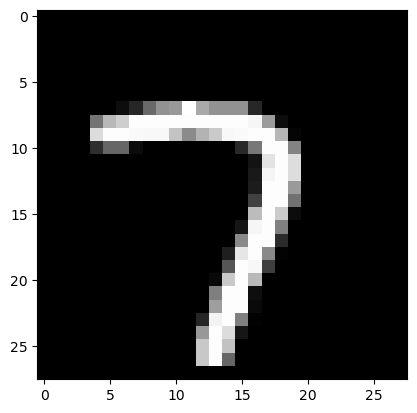

Prediction:  [1]
Label:  4


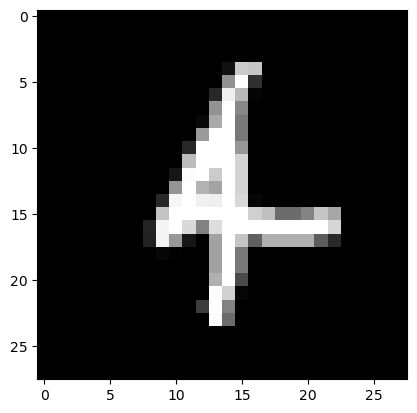

Prediction:  [4]
Label:  4


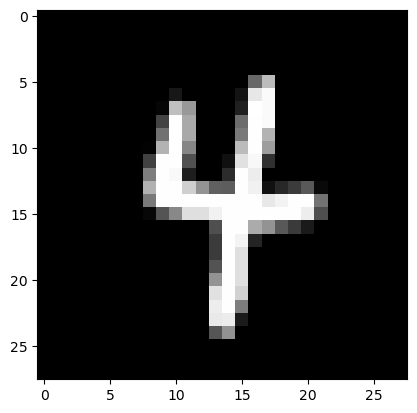

Prediction:  [3]
Label:  3


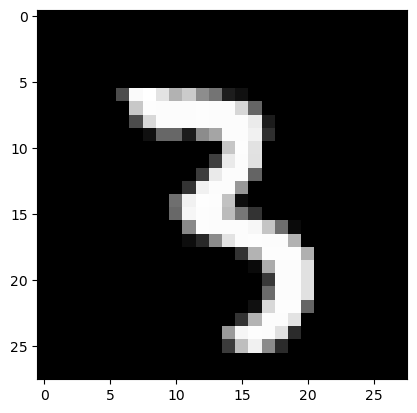

In [98]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)